In [144]:
import numpy as np
import pandas as pd

In [145]:
data=pd.read_csv("sales.csv")
data

,Age,Income,Gender,MaritialStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Female,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [146]:
data.describe()

,Age,Income,Gender,MaritialStatus,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,>35,Medium,Female,Single,Yes
freq,5,6,8,7,9


In [147]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();
#data=data.apply(le.fit_transform)
data
x=data.iloc[:,:-1]
x=x.apply(le.fit_transform)

In [148]:

y=data.iloc[:,-1]

In [149]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=10)
classifier.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [150]:
#Predict value for the given Expression
#[Age < 21, Income = Low,Gender = Female, Marital Status = Married]
test_x=np.array([1,1,0,0])
pred_y=classifier.predict([test_x])
print("Predicted class for input", test_x," is ",pred_y[0])

Predicted class for input [1 1 0 0]  is  Yes


In [151]:
#method 1 generate graph
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=StringIO()

export_graphviz(classifier,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')

True

In [152]:
#method 2 generate graph p.s. needs dot utility installed in os
from sklearn.tree import export_graphviz
export_graphviz(classfier,out_file="data.dot")
!dot -Tpng data.dot -o tree.png

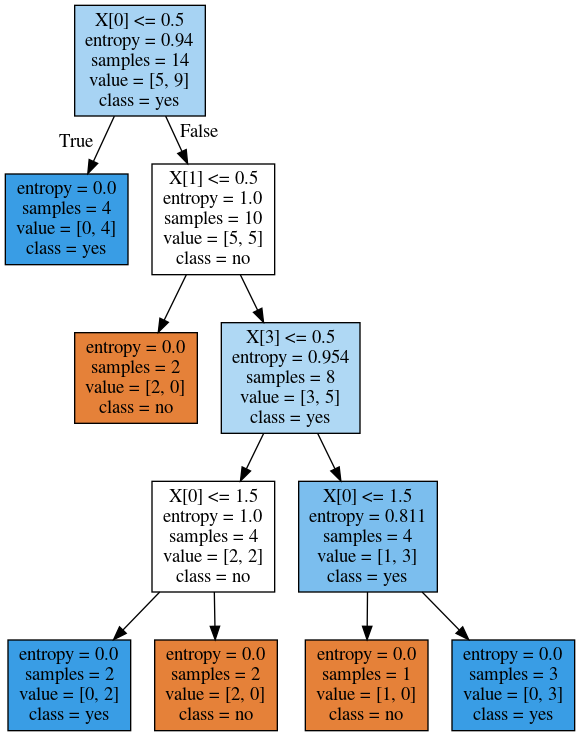

In [153]:
import pydotplus as pdd
from IPython.display import Image
dot_data = export_graphviz(classfier, out_file=None,class_names=['no', 'yes'], filled = True)

graph = pdd.graph_from_dot_data(dot_data)  

Image(graph.create_png())
graph.write_png("dtree.png")
Image(graph.create_png())

In [154]:
#run below command to install graphviz
# !pip install graphviz

In [155]:
#No need to implement below code
#if you want to split into train test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train,test=train_test_split(data.apply(le.fit_transform),test_size=0.14,random_state=0)
train_x=train.iloc[:,:-1]
train_y=train.iloc[:,-1]
test_x=test.iloc[:,:-1]
test_y=test.iloc[:,-1]
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)
accuracy=accuracy_score(test_y,pred_y)
accuracy*100

100.0

In [156]:
test

,Age,Income,Gender,MaritialStatus,Buys
8,1,1,0,0,1
6,0,1,0,0,1


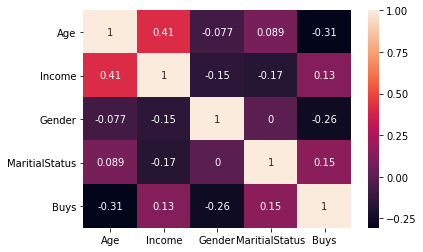

In [157]:
#just displaying correlation between fields
import seaborn as sns
corr=data.apply(le.fit_transform).corr();
sns.heatmap(corr,annot=True)